# quick_era5

## 一言以蔽之（In a nutshell）

引入套件，下載資料，儲存資料。

Import the package, download the data, and save the data.

In [10]:
from quick_era5 import era5_downloader, era5_converter
import datetime

xarr = era5_downloader.download_era5_data_from_gcs(
    variable_list=['2m_temperature', 'geopotential'],
    from_datetime=datetime.datetime(2020, 1, 1, tzinfo=datetime.timezone.utc),  # 包含此時間（include）
    to_datetime=datetime.datetime(2020, 1, 2, tzinfo=datetime.timezone.utc),  # 包含此時間（include）
    time_interval=1,  # 以小時為單位（in hours）
)

era5_converter.era5_xarray_to_netcdf(xarr, save_at="output.nc")

## 基本介紹（Introduction）

這是一個用來快速下載與轉換「歐洲中期天氣預報中心第五代再分析資料（ECMWF Reanalysis v5, ERA5）」的Python套件，可以利用它快速的下載ERA5的資料，並且將資料轉換成NetCDF、GeoTIFF等格式。若想了解更多關於ERA5的資料，請參考[ERA5](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5)。目前的版本於2024/10/26建立與更新。

This is a Python package for quickly downloading and converting the "ECMWF Reanalysis v5 (ERA5)" data. You can use it to quickly download ERA5 data and convert the data into formats such as NetCDF, GeoTIFF, etc. If you want to know more about ERA5 data, please refer to [ERA5](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5). The current version was created and updated on 2024/10/26.

## 如何安裝（Installation）

將quick_era5資料夾放到你的Python專案中，即可使用quick_era5套件，如下：

Put the quick_era5 folder in your Python project, and you can use the quick_era5 package as follows:

In [7]:
from quick_era5 import era5_downloader, era5_converter

若你有專門用來放置Python套件的資料夾，可以將quick_era5資料夾放到該資料夾中，並且在Python程式中加入以下程式碼：

If you have a folder specifically for Python packages, you can put the quick_era5 folder in that folder and add the following code to your Python program:

In [7]:
import sys
sys.path.append('path/to/quick_era5')

from quick_era5 import era5_downloader, era5_converter

## 依賴套件（Dependencies）

以下是quick_era5套件所直接引用的套件，括弧內為我測試時所使用的版本：

The following are the packages that the quick_era5 package depends on, with the version I used when testing in parentheses:

- affine (2.4.0)
- datetime
- gcsfs (2024.9.0post1)
- numpy (1.26.4)
- os
- pandas (2.2.2)
- pickle
- rasterio (1.4.1)
- xarray (2024.9.0)

## 如何下載ERA5資料（Downloading ERA5 Data）

先引用相關套件

First import the relevant packages

In [1]:
import datetime
from quick_era5 import era5_downloader, era5_converter

接著即可指定資料進行下載，下載後將回傳一個xarray的資料集，如下：

Then you can specify the data for download. After downloading, an xarray dataset will be returned, as follows:

> 注意：下載的時間必須包含時區，避免下載到錯誤的資料。
> 
> Note: The download time must include the time zone to avoid downloading the wrong data.

In [2]:
xarr = era5_downloader.download_era5_data_from_gcs(
    variable_list=['2m_temperature', 'geopotential'],
    from_datetime=datetime.datetime(2020, 1, 1, tzinfo=datetime.timezone.utc),  # 包含此時間（include）
    to_datetime=datetime.datetime(2020, 1, 2, tzinfo=datetime.timezone.utc),  # 包含此時間（include）
    time_interval=1,  # 以小時為單位（in hours）
)

xarr

<xarray.Dataset> Size: 4GB
Dimensions:         (time: 25, latitude: 721, longitude: 1440, level: 37)
Coordinates:
  * latitude        (latitude) float32 3kB 90.0 89.75 89.5 ... -89.75 -90.0
  * level           (level) int64 296B 1 2 3 5 7 10 ... 875 900 925 950 975 1000
  * longitude       (longitude) float32 6kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * time            (time) datetime64[ns] 200B 2020-01-01 ... 2020-01-02
Data variables:
    2m_temperature  (time, latitude, longitude) float32 104MB ...
    geopotential    (time, level, latitude, longitude) float32 4GB ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-10-17 20:04:10.783634
    valid_time_stop:   2024-07-31

資料下載後，將會存放在快取資料夾內，以便下次快速存取，不過預設僅會保存14天，超過後將會於下次執行下載時自動刪除。若要調整快取檔案的存放期限，可以自行調整，如下：

After the data is downloaded, it will be stored in the cache folder for quick access next time. However, it will only be saved for 14 days by default. If it exceeds this period, it will be automatically deleted the next time it is downloaded. If you want to adjust the storage period of the cache file, you can adjust it yourself, as follows:

In [3]:
# 一天後刪除cache
# Delete cache after 1 day
era5_downloader.expire_days = 1

## 將xarray資料集進行轉換（Converting xarray Dataset）

### 轉換成NetCDF檔案（Convert to NetCDF File）

若要將xarray的資料集轉換成NetCDF檔案，可以使用以下程式碼：

If you want to convert the xarray dataset to a NetCDF file, you can use the following code:

In [4]:
xarr = xarr
save_at = 'output.nc'
era5_converter.era5_xarray_to_netcdf(xarr=xarr, save_at=save_at)

### 將xarray資料集轉換成GeoTIFF檔案（Convert xarray Dataset to GeoTIFF File）

若要將指定變數、高度、時間的xarray的資料集轉換成GeoTIFF檔案，可以使用以下程式碼：

If you want to convert the xarray dataset with specified variables, heights, and times to a GeoTIFF file, you can use the following code:

In [5]:
# 當變數只有一個高度時，z設為None
# When the variable has only one height, set z to None
xarr = xarr
variable = '2m_temperature'
z = None 
time = datetime.datetime(2020, 1, 1, 12, tzinfo=datetime.timezone.utc)
save_at = 'output_2m_temperature.tif'
era5_converter.era5_xarray_to_geotiff(xarr=xarr, variable=variable, z=z, time=time, save_at=save_at)


# 當變數包含多種高度時，z設為要的高度
# When the variable has multiple heights, set z to the desired height
xarr = xarr
variable = '2m_temperature'
z = None 
time = datetime.datetime(2020, 1, 1, 12, tzinfo=datetime.timezone.utc)
save_at = 'output_2m_temperature.tif'
era5_converter.era5_xarray_to_geotiff(xarr=xarr, variable=variable, z=z, time=time, save_at=save_at)

### 將xarray資料集轉換成numpy陣列（Convert xarray Dataset to Numpy Array）   

若要將xarray的資料集轉換成numpy陣列，可以使用以下程式碼：

If you want to convert the xarray dataset to a numpy array, you can use the following code:

In [8]:
xarr = xarr
variable = '2m_temperature'
z = None
time = datetime.datetime(2020, 1, 1, 12, tzinfo=datetime.timezone.utc)
arr = era5_converter.era5_xarray_to_nparray(xarr=xarr, variable=variable, z=z, time=time)

以下程式碼示範如何快速繪製該numpy陣列：

The following code demonstrates how to quickly plot the numpy array:

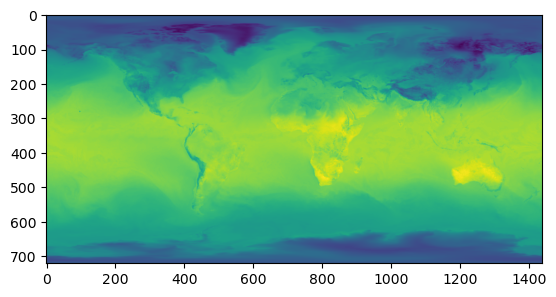

In [9]:
from matplotlib import pyplot as plt
plt.imshow(arr)

## 資料來源（Data Source）

本套件使用的ERA5資料來源為google cloud storage所存放之公開資料集，詳細資訊請參考[ERA5 data on Google Cloud](https://cloud.google.com/storage/docs/public-datasets/era5)。

The ERA5 data used by this package is from the public dataset stored in google cloud storage. For more information, please refer to [ERA5 data on Google Cloud](https://cloud.google.com/storage/docs/public-datasets/era5).

## 完整說明文件

### era5_downloader 設定

#### era5_gcp_path

此設定值用來指定ERA5資料在GCS中的路徑，預設為`gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3`。

#### expire_days

此設定值用來指定快取檔案的存放期限，預設為14天。

### era5_downloader 函數

#### download_era5_data_from_gcs

下載GCS中的ERA5資料，並回傳xarray資料集。


參數：
- variable_list: list, 要下載的變數列表。
- from_date: datetime.datetime, 資料的起始時間。
- to_date: datetime.datetime, 資料的結束時間（包含此時間）。
- data_steps: int, 每筆資料之間的時間間隔。

回傳：
- xarray.Dataset, 下載的ERA5資料集。


#### show_era5_variables

顯示ERA5資料集中的氣象變數。

參數：
- 無

回傳：
- list, ERA5資料集中的氣象變數列表。

### era5_converter 函數

#### convert_xarray_to_netcdf

將xarray資料集存成NetCDF檔案。

參數：
- xarr: xarray.core.dataset.Dataset, 要存的xarray資料集。
- file_path: str, 要存的檔案路徑。

回傳：
- None

#### convert_xarray_to_geotiff

將xarray資料集中指定的變數、高度、時間資料存成GeoTIFF檔案。

參數：
- xarr: xarray.core.dataset.Dataset, 要存的xarray資料集。
- variable: str, 要存的變數。
- z: int or float or None, 要存的高度，若資料只有一個高度，請使用None。
- time: datetime.datetime, 要存的時間，若時區為None，將會轉換成UTC。
- save_at: str, 要存的GeoTIFF檔案路徑。

回傳：
- None

#### convert_xarray_to_numpy_array

將xarray資料集中指定的變數、高度、時間資料存成numpy陣列。

參數：
- xarr: xarray.core.dataset.Dataset, 要存的xarray資料集。
- variable: str, 要存的變數。
- z: int or float or None, 要存的高度，若資料只有一個高度，請使用None。
- time: datetime.datetime, 要存的時間，若時區為None，將會轉換成UTC。

回傳：
- np.ndarray, 指定變數、高度、時間資料的numpy陣列。

## Full Documentation

### era5_downloader settings

#### era5_gcp_path

This setting value is used to specify the path of ERA5 data in GCS, and the default value is `gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3`.

#### expire_days

This setting value is used to specify the storage period of the cache file, and the default value is 14 days.

### era5_downloader functions

#### download_era5_data_from_gcs

Download the era5 data from GCS and return the xarray dataset.

Args:
- variable_list: list, list of variables to download.
- from_date: datetime.datetime, start datetime of the data.
- to_date: datetime.datetime, end datetime (include this datetime) of the data.
- data_steps: int, hours between each data.

Returns:
- xarray.Dataset, the era5 dataset.

#### show_era5_variables

Show the variables in the era5 dataset.

Args:
- None
    
Returns:
- list, list of variables in the era5 dataset.

### era5_converter functions

#### convert_xarray_to_netcdf

Save the xarray dataset to a netcdf file.

Args:
- xarr, xarray.core.dataset.Dataset, the xarray dataset to save.
- file_path, str, the file path to save the xarray dataset.

Returns:
- None

#### convert_xarray_to_geotiff

Save the specified variable, pressure level, time data in the xarray dataset to a geotiff file.

Args:
- xarr: xarray.core.dataset.Dataset, the xarray dataset to save.
- variable: str, the variable to save.
- z: int or float or None, the z level to save, if data has only one level, use None.
- time: datetime.datetime, the time to save, if timezone is None, it will be converted to UTC.
- save_at: str, the file path to save geotiff file.

Returns:
- None

#### convert_xarray_to_numpy_array

Save the specified variable, pressure level, time data in the xarray dataset to a numpy array.

Args:
- xarr: xarray.core.dataset.Dataset, the xarray dataset to save.
- variable: str, the variable to save.
- z: int or float or None, the z level to save, if data has only one level, use None.
- time: datetime.datetime, the time to save, if timezone is None, it will be converted to UTC.

Returns:
- np.ndarray, the numpy array of the specified variable, pressure level, time data.